# PyIntegral
## Legacy fortran routines in python for numerical integration

email: antineutrinomuon@gmail.com, jean@astro.up.pt

© Copyright ®

J.G. - Jean Gomes

last version tested: 0.0.11

[comment]: Define_Integral.py
<img src='Definite_Integral.png'>

In [1]:
# Import standard libraries in python
import numpy as np
import matplotlib.pyplot as plt

# Import numerical integration libraries from pyintegralall
from PyIntegral import flib
from PyIntegral.PyIntegral import PyIntegral_class

In [2]:
# Libraries
print(flib.__doc__)

This module 'flib' is auto-generated with f2py (version:1.21.5).
Functions:
  yy_value,ilastval,iskeepon = lininterpol(xx_value,xold_vec,yold_vec,ilastval,verbosity=0)
  a = author_linterpol()
  z = gausslegendrequadrature(x,y,a,b,n_int=20)
  a = author_gausslegendrequadrature()
  integralall,iskeepon = integralall(sxvalues,syvalues,lambda_i,lambda_f,int_type=2,verbosity=0)
  a = author_integralall()
Fortran 90/95 modules:
  moddatatype --- ib,sp,rp,lb,qp,ch,st,ec.


In [3]:
# Numerical integration library
print(flib.integralall.__doc__)

integralall,iskeepon = integralall(sxvalues,syvalues,lambda_i,lambda_f,[int_type,verbosity])

Wrapper for ``integralall``.

Parameters
----------
sxvalues : input rank-1 array('d') with bounds (n_lambda)
syvalues : input rank-1 array('d') with bounds (n_lambda)
lambda_i : input float
lambda_f : input float

Other Parameters
----------------
int_type : input int, optional
    Default: 2
verbosity : input int, optional
    Default: 0

Returns
-------
integralall : float
iskeepon : int



In [4]:
# Python class
print(PyIntegral_class.__doc__)

'Created on 
Last version on Wed Sep 23 14:33:51 2020

@author: Jean Gomes Copyright (c)



In [5]:
# Import astropy libraries
from astropy.io import fits
from astropy import units as u
from astropy.visualization import quantity_support

In [6]:
# Example of a slice of a SDSS spectrum
f = fits.open('https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits')  

# The spectrum is in the second HDU of this file.
specdata = f[1].data[1020:1250] 
f.close()

In [7]:
# Import specutils to convert format
from specutils import Spectrum1D

lamb = 10**specdata['loglam'] * u.AA 
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
input_spec = Spectrum1D(spectral_axis=lamb, flux=flux)

Text(0, 0.5, 'Fluxes')

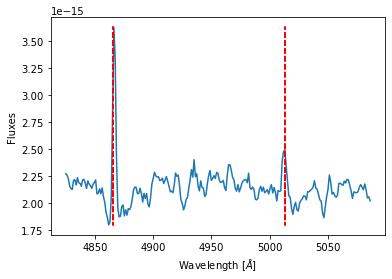

In [8]:
# Plot spectrum
delta_l = 4.5
plt.plot(lamb,flux)
plt.plot(lamb.value*0+4861+delta_l,flux,linestyle='--',color='red')
plt.plot(lamb.value*0+5009+delta_l,flux,linestyle='--',color='red')

plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Fluxes')

Text(0.5, 1.0, 'Shaded area below spectrum')

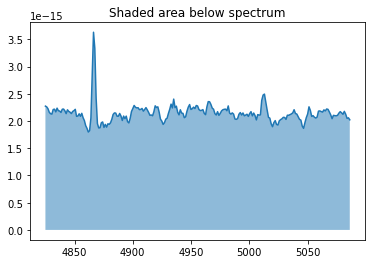

In [9]:
# Shaded area of spectrum
plt.plot(lamb,flux)
plt.fill_between(lamb.value,flux.value,alpha=0.5)
plt.title('Shaded area below spectrum')

In [10]:
# Now integrate numerically spectrum over the available range using pyintegralall routines
# Set minimum and maximum values
lambda_i = lamb[0].value
lambda_f = lamb[-1].value
A_fortran,iskeepon = flib.integralall( lamb,flux,lambda_i,lambda_f )
print("Integral of spectrum in the available range {0:10.6g} {1:}".format(A_fortran,flux.unit))

Integral of spectrum in the available range 5.59925e-13 erg / (Angstrom cm2 s)


### The default method is trapezium in pyintegralall, but one may choose:
<p>
<table>
<tr><td>Int_Type</td><td>Type</td><td>Description</td></tr>
<tr><td>0<td>R</td><td>Right rectangle Integral  </td></tr>
<tr><td>1<td>L</td><td>Left rectangle Integral   </td></tr>
<tr><td>2<td>T</td><td>Trapezoidal rule          </td></tr>
<tr><td>3<td>S</td><td>Simple Integral           </td></tr>
<tr><td>4<td>M</td><td>Median rectangle Integral </td></tr>
<tr><td>5<td>I</td><td>Simpsonregel's rule       </td></tr>
<tr><td>6<td>G</td><td>Gauss-Legendre Quadrature </td></tr>
</table>

Text(0.5, 1.0, 'Examples in graph')

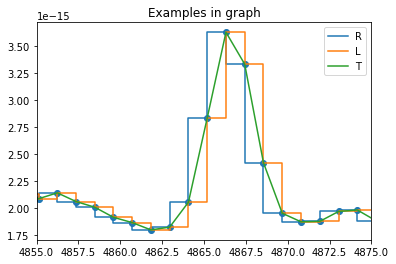

In [11]:
# Integral examples: Left, Right and Trapezoidal rules
plt.figure()
plt.scatter( lamb,flux )

x=np.array(lamb.value, dtype=float)
y=np.array(flux.value, dtype=float)

dx = np.zeros([x.size], dtype=float)
dxtrapezoidal = (x[1:] - x[0:-1])
y_trapezoidal = (y[1:] + y[0:-1]) * 0.5
dx[0]  = dxtrapezoidal[0]
dx[1:] = dxtrapezoidal

x_trapezoidal_representation = np.concatenate([x ,x[0:-1]+dxtrapezoidal])
dxtrapezoidal_representation = np.concatenate([dx,dxtrapezoidal])
i_trapezoidal_representation = np.argsort(x_trapezoidal_representation)
x_trapezoidal_representation = x_trapezoidal_representation[i_trapezoidal_representation]
y_trapezoidal_representation = np.interp(x_trapezoidal_representation,x,y)

# Check integral
#print(np.sum(y_trapezoidal*dxtrapezoidal))

plt.step( x,y,label='R' )
plt.step( x[1:],y[0:-1],label='L' )
#plt.step( x[1:]+dxtrapezoidal,y_trapezoidal,label='T' )
plt.plot( x_trapezoidal_representation,y_trapezoidal_representation, label='T' )

plt.xlim( 4855,4875 )
plt.legend()
plt.title('Examples in graph')

In [12]:
# Let us compare the results from different integration types

lista = ['Right rectangle Integral','Left rectangle Integral','Trapezoidal rule', 'Simple Integral', 
         'Median rectangle Integral', "Simpsonregel's rule", 'Gauss-Legendre Quadrature']

lambda_i = lamb[0].value
lambda_f = lamb[-1].value
for int_type in range(0,7):    
    A_fortran,iskeepon = flib.integralall( lamb,flux,lambda_i,lambda_f, int_type=int_type )
    print("int_type: {0:} | name: {1:>25s} | Area: {2:10.6e}".format(int_type,lista[int_type],A_fortran))

int_type: 0 | name:  Right rectangle Integral | Area: 5.600681e-13
int_type: 1 | name:   Left rectangle Integral | Area: 5.597812e-13
int_type: 2 | name:          Trapezoidal rule | Area: 5.599246e-13
int_type: 3 | name:           Simple Integral | Area: 5.624327e-13
int_type: 4 | name: Median rectangle Integral | Area: 5.599246e-13
int_type: 5 | name:       Simpsonregel's rule | Area: 5.599246e-13
int_type: 6 | name: Gauss-Legendre Quadrature | Area: 5.541193e-13


In [13]:
# We can also compare with traditional numpy trapezium integration
A_numpy = np.trapz( flux,x=lamb )
print("Numpy Trapezium | Area: {0:10.6g}".format(A_numpy))
print("Ratio of Numpy Trapezium to the 6 integration methods from pyintegralall: ")
for int_type in range(0,7):    
    A_fortran,iskeepon = flib.integralall( lamb,flux,lambda_i,lambda_f, int_type=int_type )
    print("int_type: {0:} | Area Fortran / Area Numpy Trapezium: {1:10.6f}".format(int_type,A_fortran/A_numpy.value))

Numpy Trapezium | Area: 5.59925e-13 erg / (cm2 s)
Ratio of Numpy Trapezium to the 6 integration methods from pyintegralall: 
int_type: 0 | Area Fortran / Area Numpy Trapezium:   1.000256
int_type: 1 | Area Fortran / Area Numpy Trapezium:   0.999744
int_type: 2 | Area Fortran / Area Numpy Trapezium:   1.000000
int_type: 3 | Area Fortran / Area Numpy Trapezium:   1.004479
int_type: 4 | Area Fortran / Area Numpy Trapezium:   1.000000
int_type: 5 | Area Fortran / Area Numpy Trapezium:   1.000000
int_type: 6 | Area Fortran / Area Numpy Trapezium:   0.989632


In [14]:
# We can also call the class PyIntegralALL_class
i_object = PyIntegral_class( lamb.value,flux.value, int_type=2, verbosity=1 )
print("... Area: {0:10.6g}".format(i_object.integralall))

... Integration from lambda_i: 4825.0302734375 to lambda_f: 5086.27587890625 
... Area: 5.59925e-13
    [IntegralALL]
    T-> Integral
           1       1       0       0
    ... SIntegra: 0.559925E-12
    [IntegralALL]
